In [73]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Alpha cases
alphas = [r'$\alpha$=0', r'$\alpha$=8', r'$\alpha$=16', r'$\alpha$=32']

metric_name = "Top-1 Accuracy"
y_label = "Accuracy"
y_lim = (0.0, 100.0)   # percentage scale

# DATASET
dataset = "ImageNet-1K-Top5"
# Model
model_name = "CNN"

# MNIST
# accuracies = {
#     "AlexNet":   [99.18, 98.98, 98.47, 10.11],
#     "VGG16":     [99.42, 99.36, 99.38, 10.04],
#     "ResNet18":  [99.27, 95.07, 10.16, 11.35],
#     "ResNet34":  [99.28, 62.67,  9.75,  8.92],
#     "ResNet50":  [99.30, 98.91, 98.28,  9.58],
#     "ResNet101": [99.31, 99.06, 98.69,  9.58],
# }

# Fashion-MNIST
# accuracies = {
#     "AlexNet":   [90.77, 89.62, 41.36, 10.00],
#     "VGG16":     [94.97, 94.46, 94.10, 10.00],
#     "ResNet18":  [92.36, 85.30, 30.20, 10.00],
#     "ResNet34":  [92.59, 32.78, 24.30, 10.00],
#     "ResNet50":  [91.14, 28.78, 21.14, 10.00],
#     "ResNet101": [91.64, 47.67, 34.98, 10.00],
# }

# E-MNIST
# accuracies = {
#     "AlexNet":   [94.54, 93.06, 92.93, 4.42],
#     "VGG16":     [94.09, 93.99, 93.88, 2.61],
#     "ResNet18":  [93.79, 62.67,  8.75, 3.85],
#     "ResNet34":  [94.00, 92.03, 85.75, 3.85],
#     "ResNet50":  [93.98, 85.38, 43.09, 5.18],
#     "ResNet101": [93.80, 93.65, 92.99, 3.85],
# }

# CIFAR10
# accuracies = {
#     "AlexNet":   [88.29, 86.13, 45.70, 12.08],
#     "VGG16":     [99.78, 92.48, 88.84,  9.99],
#     "ResNet18":  [93.41, 92.55, 92.00, 10.00],
#     "ResNet34":  [93.24, 93.20, 92.57, 10.00],
#     "ResNet50":  [90.45, 89.02, 87.40, 10.00],
#     "ResNet101": [91.93, 91.31, 87.95, 10.00],
# }

# ImageNet-1K-Top1
# accuracies = {
#     "AlexNet":   [56.78, 23.04,  3.08, 0.07],
#     "VGG16":     [72.79, 70.95, 46.62, 0.11],
#     "ResNet18":  [70.19, 63.56, 36.35, 0.08],
#     "ResNet34":  [73.56, 72.08, 70.36, 0.10],
#     "ResNet50":  [75.84, 73.25, 24.56, 0.10],
#     "ResNet101": [77.72, 75.45, 60.86, 0.10],
# }

# ImageNet-1K-Top5
accuracies = {
    "AlexNet":   [79.04, 42.99,  8.25, 0.49],
    "VGG16":     [91.06, 89.87, 71.03, 0.49],
    "ResNet18":  [89.36, 84.51, 59.66, 0.52],
    "ResNet34":  [91.53, 90.70, 89.73, 0.50],
    "ResNet50":  [92.75, 91.31, 53.62, 0.47],
    "ResNet101": [93.83, 92.54, 82.65, 0.50],
}

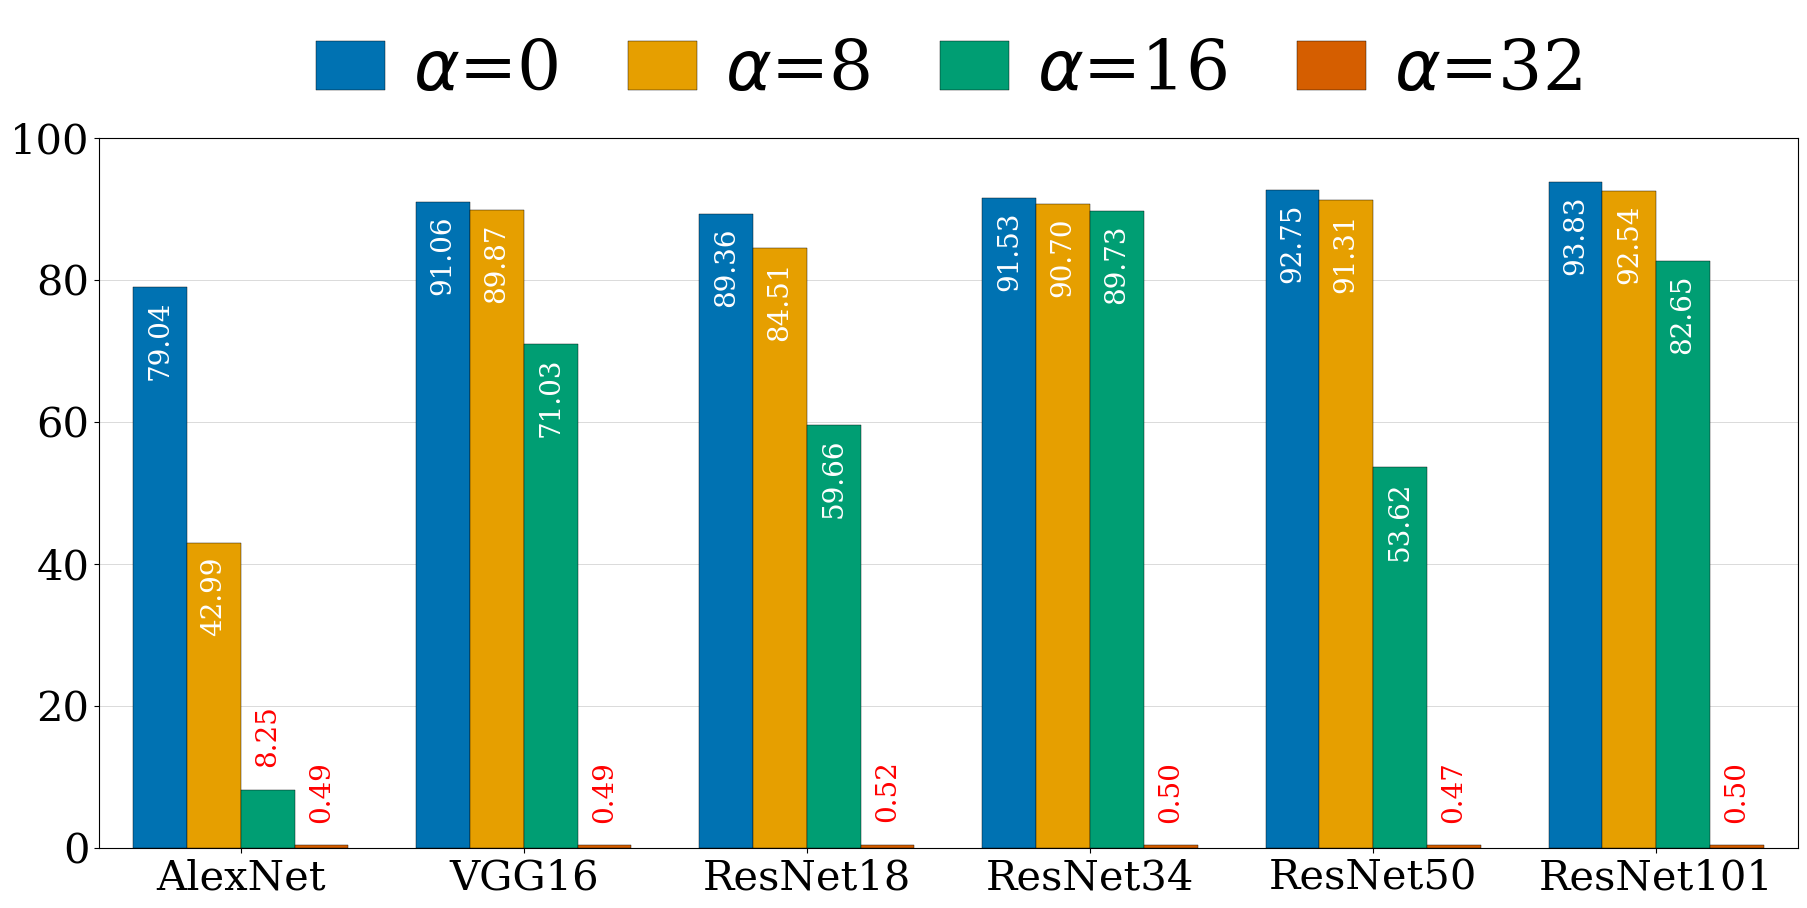

In [ ]:
mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "DejaVu Serif"],
    "axes.labelsize": 20,
    "xtick.labelsize": 30,
    "ytick.labelsize": 30,
    "legend.fontsize": 50,
    "axes.titlesize": 20,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    "axes.spines.top": True,
    "axes.spines.right": True,
})

alpha_colors = ['#0072B2', '#E69F00', '#009E73', '#D55E00']
palette = dict(zip(alphas, alpha_colors))

models = ["AlexNet", "VGG16", "ResNet18", "ResNet34", "ResNet50", "ResNet101"]
n_models = len(models)
n_alpha = len(alphas)

fig_width_in = 18
fig_height_in = 9
fig, ax = plt.subplots(figsize=(fig_width_in, fig_height_in))
fig.patch.set_facecolor("white")

bar_w = 0.19
group_centers = np.arange(n_models)
offsets = (np.arange(n_alpha) - (n_alpha - 1) / 2.0) * bar_w

fmt = "{:.2f}"
for i, a_lab in enumerate(alphas):
    vals = [accuracies[m][i] for m in models]
    x = group_centers + offsets[i]
    bars = ax.bar(
        x, vals, width=bar_w, label=a_lab,
        color=palette[a_lab], edgecolor='black', linewidth=0.3, zorder=3
    )
    for b, v in zip(bars, vals):
        x_txt = b.get_x() + b.get_width() / 2.0
        y_txt = v - 7.5 if v > 20 else v + 7.5
        ax.text(
            x_txt, y_txt, fmt.format(v),
            ha='center', va='center',
            rotation=90,
            fontsize=20,
            clip_on=False,
            color='white' if v > 15 else 'red'
        )

ax.set_xticks(group_centers)
ax.set_xticklabels(models)
ax.set_ylim(*y_lim)
ax.set_xlim(-0.5, n_models - 0.5)
ax.margins(x=0.02)

ax.grid(axis='y', which='major', linestyle='-', linewidth=0.5, color='0.80')
ax.set_axisbelow(True)

ax.legend(
    ncol=n_alpha, loc='lower center', bbox_to_anchor=(0.5, 0.96),
    frameon=False, handlelength=1.0, columnspacing=1.0, handletextpad=0.4, title=None
)

plt.tight_layout(pad=0.4)

pdf_name = f"{dataset}-{model_name}-Obfuscated_Model_Accuracy.pdf"
fig.savefig(pdf_name, bbox_inches="tight", pad_inches=0.02)
plt.show()
plt.close(fig)